In [1]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [2]:
!pip install ucimlrepo

In [3]:
# Fetch the Heart Disease dataset from UCIML repository
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Load the data and target into pandas DataFrames
X = heart_disease.data.features
y = heart_disease.data.targets

# Metadata
print(heart_disease.metadata)

# Display variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [4]:
# Check for categorical columns and encode them if necessary
# For this dataset, 'sex', 'cp', 'fbs', 'restecg', 'exang' are categorical features
le = LabelEncoder()
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang']

for column in categorical_columns:
    X[column] = le.fit_transform(X[column])


<ipython-input-4-5e4378de4af3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-4-5e4378de4af3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-4-5e4378de4af3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [5]:

# 0 -> Absence of heart disease
# 1, 2, 3, 4 -> Presence of heart disease (convert to 1)
y_binary = y.copy()
y_binary[y_binary > 0] = 1  # Convert all non-zero values to 1 (presence of heart disease)

# Split the data into training and test sets using the binary target (y_binary)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


In [8]:
# Check for NaNs in X_train and X_test and impute them if necessary
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [9]:
# Normalize the feature columns to ensure they are on the same scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
# Reshape data for CNN input format (3D input)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [11]:
# Define the Dense model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the Dense model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
# Train the Dense model
history_dense = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 353ms/step - accuracy: 0.6011 - loss: 0.6706 - val_accuracy: 0.7377 - val_loss: 0.6184
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7422 - loss: 0.6026 - val_accuracy: 0.7869 - val_loss: 0.5686
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7878 - loss: 0.5537 - val_accuracy: 0.7705 - val_loss: 0.5258
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7941 - loss: 0.5167 - val_accuracy: 0.7705 - val_loss: 0.4897
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8222 - loss: 0.4812 - val_accuracy: 0.8033 - val_loss: 0.4577
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8176 - loss: 0.4582 - val_accuracy: 0.8033 - val_loss: 0.4326
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7982 - loss: 0.4456 - val_accuracy: 0.8033 - val_loss: 0.4099
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7741 - loss: 0.4550 - val_accuracy: 0.8033 - val_loss: 0.3954
Epoch 

In [14]:
# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(32, 2, activation='relu', input_shape=X_train_cnn.shape[1:]))  # Convolutional layer
model_cnn.add(Flatten())  # Flatten layer
model_cnn.add(Dense(32, activation='relu'))  # Dense layer
model_cnn.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the CNN model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
history_cnn = model_cnn.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=10, batch_size=32, verbose=1)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.5273 - loss: 0.6694 - val_accuracy: 0.8361 - val_loss: 0.5370
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7905 - loss: 0.5488 - val_accuracy: 0.8689 - val_loss: 0.4519
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8282 - loss: 0.4590 - val_accuracy: 0.8852 - val_loss: 0.3899
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8521 - loss: 0.4030 - val_accuracy: 0.8689 - val_loss: 0.3589
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8610 - loss: 0.3656 - val_accuracy: 0.8525 - val_loss: 0.3444
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8370 - loss: 0.3858 - val_accuracy: 0.8689 - val_loss: 0.3435
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8474 - loss: 0.3455 - val_accuracy: 0.8525 - val_loss: 0.3395
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8479 - loss: 0.3543 - val_accuracy: 0.8525 - val_loss: 0.3469
Epoch 9/10
8/8 ━━

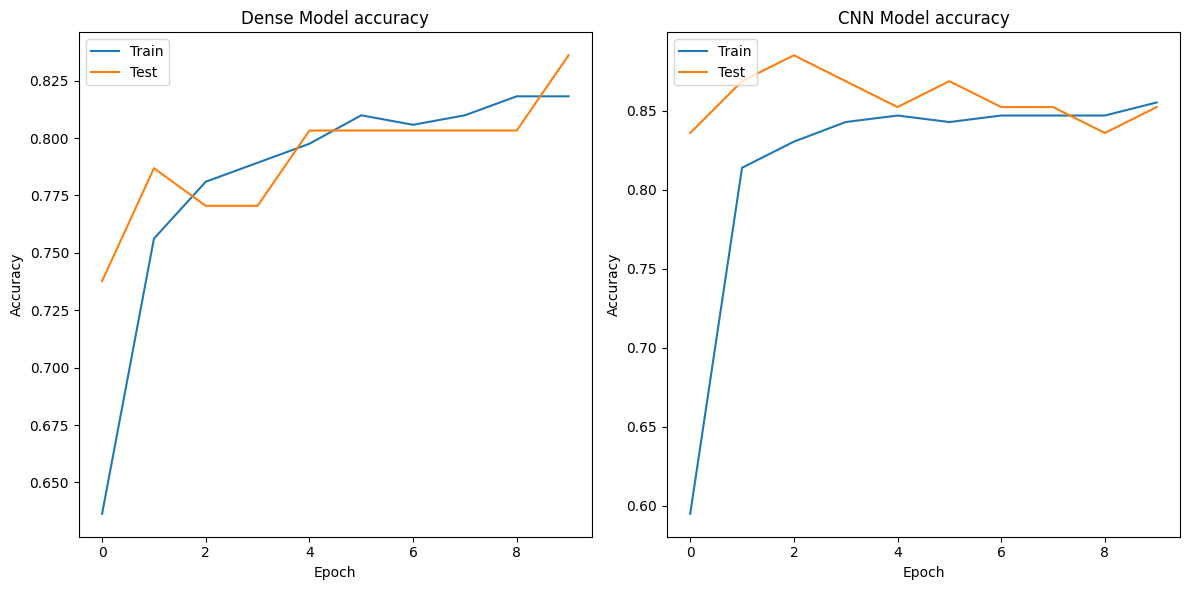

In [15]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_dense.history['accuracy'])
plt.plot(history_dense.history['val_accuracy'])
plt.title('Dense Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()



Evaluation Metrics for Dense Model:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



<Axes: >

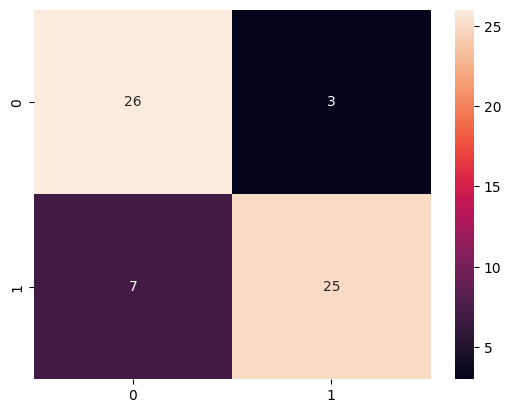

In [16]:
# Evaluate Dense Model
print("\nEvaluation Metrics for Dense Model:")
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)



Evaluation Metrics for CNN Model:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



<Axes: >

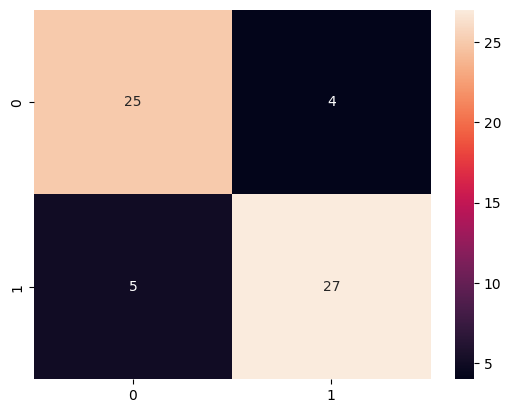

In [17]:
# Evaluate CNN Model
print("\nEvaluation Metrics for CNN Model:")
predictions_cnn = (model_cnn.predict(X_test_cnn) > 0.5).astype("int32")
print(classification_report(y_test, predictions_cnn))
cm_cnn = confusion_matrix(y_test, predictions_cnn)
sns.heatmap(cm_cnn, annot=True)


**Figures**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


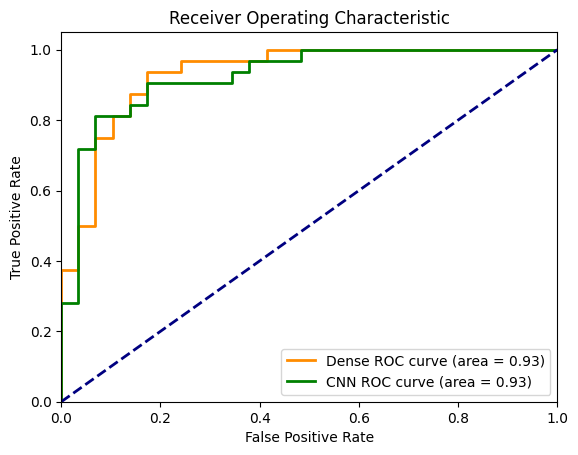

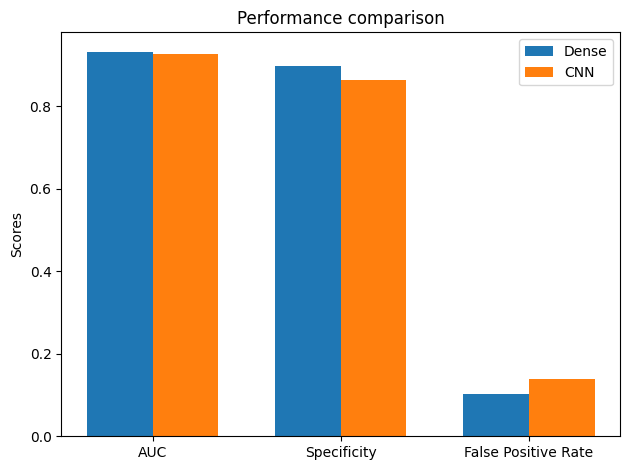

In [20]:


# Proceed if no NaNs
from sklearn.metrics import roc_curve, auc

# Dense Model predictions as probabilities
pred_prob_dense = model.predict(X_test)

# CNN Model predictions as probabilities
pred_prob_cnn = model_cnn.predict(X_test_cnn)

# Calculate ROC curves and AUC scores for binary classification
fpr_dense, tpr_dense, _ = roc_curve(y_test, pred_prob_dense)  # y_test is binary (0, 1)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, pred_prob_cnn)        # y_test is binary (0, 1)
roc_auc_dense = auc(fpr_dense, tpr_dense)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# Plot ROC Curves
plt.figure()
lw = 2
plt.plot(fpr_dense, tpr_dense, color='darkorange', lw=lw, label='Dense ROC curve (area = %0.2f)' % roc_auc_dense)
plt.plot(fpr_cnn, tpr_cnn, color='green', lw=lw, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate Specificity and False Positive rate
tn_dense, fp_dense, fn_dense, tp_dense = confusion_matrix(y_test, predictions).ravel()
specificity_dense = tn_dense / (tn_dense + fp_dense)
fpr_dense = 1 - specificity_dense

tn_cnn, fp_cnn, fn_cnn, tp_cnn = confusion_matrix(y_test, predictions_cnn).ravel()
specificity_cnn = tn_cnn / (tn_cnn + fp_cnn)
fpr_cnn = 1 - specificity_cnn

# Performance comparison
labels = ['AUC', 'Specificity', 'False Positive Rate']
dense_metrics = [roc_auc_dense, specificity_dense, fpr_dense]
cnn_metrics = [roc_auc_cnn, specificity_cnn, fpr_cnn]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dense_metrics, width, label='Dense')
rects2 = ax.bar(x + width/2, cnn_metrics, width, label='CNN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()
